In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame 
from pylab import rcParams
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#as ask to use fewer colium
df = titanic.drop(columns = ['PassengerId','Ticket','Name','Cabin','Embarked'])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
# Verify the null values count
df.isnull().values.sum()

177

In [8]:
#Data frame Info like column types and counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [10]:
#Function to remove the null values from age column and making it as categorical type
def removenullfromAge(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [11]:
# Calling the null removalfrom age column function
df=removenullfromAge(df)

In [12]:
# verifying null values in the dataframe
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
# Making fares column as categorical using Bins
bins = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', 'Low_Fare', 'Med_fare', 'High_Fare', 'Very_High_Fare']
categories = pd.cut(df.Fare, bins, labels=group_names)
df.Fare = categories

In [14]:
df['Sex'],uniq = pd.factorize(df['Sex'])
df['Fare'],uniq = pd.factorize(df['Fare'])
df['Age'],uniq = pd.factorize(df['Age'])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,0,1,0,0
1,1,1,1,1,1,0,1
2,1,3,1,2,0,0,0
3,1,1,1,2,1,0,1
4,0,3,0,2,0,0,2


In [16]:
# Classifying dependent and independent variables in to Y,X
y=df['Survived']
X=df.drop('Survived',axis=1)

In [17]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

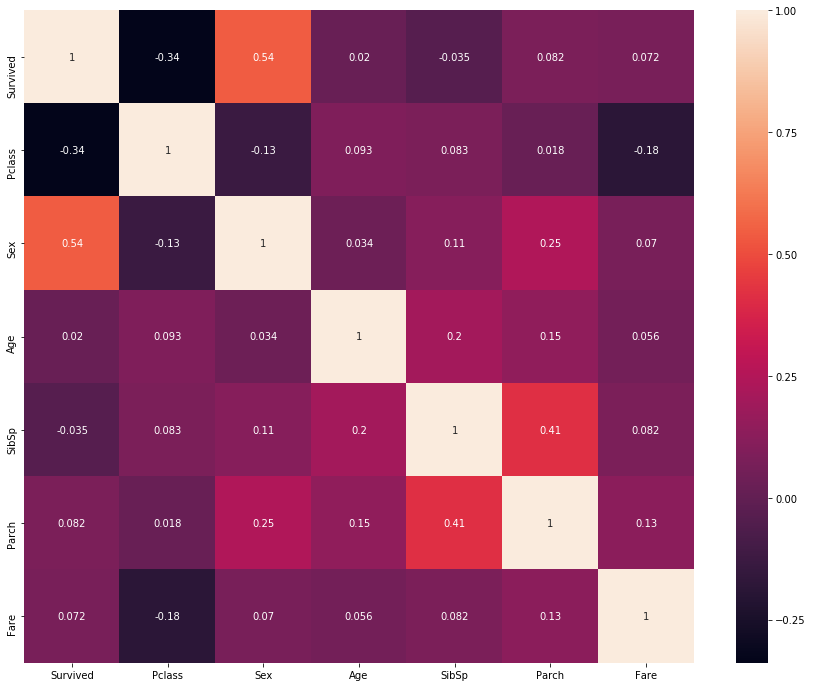

In [18]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [22]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [21]:

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=10)

NameError: name 'model' is not defined

In [23]:
# learning the training data and fitting them 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [24]:
top_param=grid_search.best_estimator_

In [25]:
best_model=XGBClassifier(learning_rate=top_param.learning_rate,booster=top_param.booster,gamma=top_param.gamma,n_estimators=top_param.n_estimators)

In [26]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
best_model.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8523274478330658

In [28]:
# fitting againist test data
best_model.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8283582089552238